In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.shape

(200, 5)

In [4]:
df.drop('CustomerID', axis= 1, inplace= True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [8]:
import matplotlib.pyplot as plt

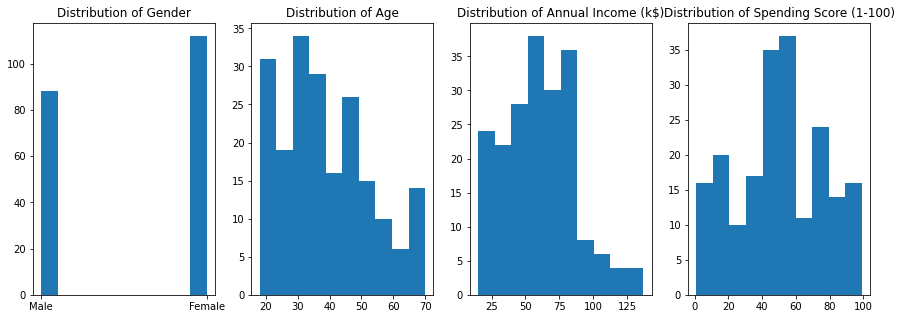

In [9]:
plt.figure(1, figsize=(15, 5))
n = 0
for col in df.columns:
    n += 1
    plt.subplot(1, 4, n)
    plt.hist(df[col])
    plt.title(f'Distribution of {col}')

plt.show()

In [10]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


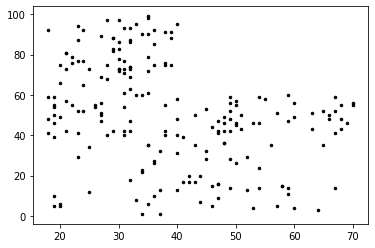

In [11]:
plt.plot(df['Age'], df['Spending Score (1-100)'], 'k.', markersize= 5)

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans_per_k_2d = [KMeans(n_clusters=k, random_state=42).fit(df.drop(['Gender', 'Annual Income (k$)'], axis= 1)) for k in range(1, 11)]
inertias_2d = [model.inertia_ for model in kmeans_per_k_2d]

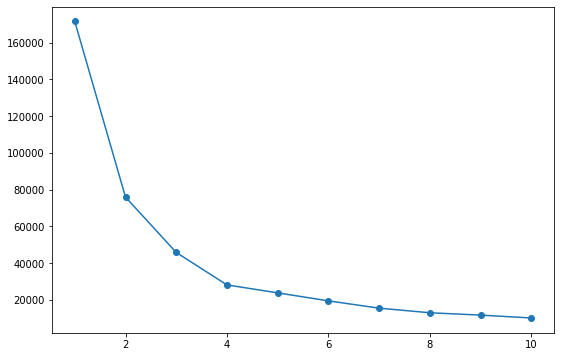

In [14]:
plt.figure(figsize=(9, 6))
plt.plot(range(1, 11), inertias_2d, "o-")

In [15]:
model_2d = KMeans(n_clusters= 4, init= 'k-means++')
model_2d.fit(df.drop(['Gender', 'Annual Income (k$)'], axis= 1))

KMeans(n_clusters=4)

In [16]:
from sklearn.metrics import silhouette_score
silhouette_score(df.drop(['Gender', 'Annual Income (k$)'], axis= 1), model_2d.labels_)

0.49973941540141753

In [17]:
model_2d.cluster_centers_

array([[30.1754386 , 82.35087719],
       [27.61702128, 49.14893617],
       [55.70833333, 48.22916667],
       [43.29166667, 15.02083333]])

Text(0, 0.5, 'Spending Score (1-100)')

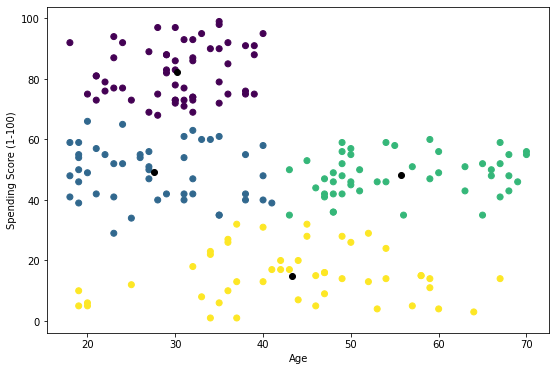

In [18]:
plt.figure(figsize= (9, 6))
plt.scatter(df['Age'], df['Spending Score (1-100)'], c= model_2d.labels_)
plt.scatter(model_2d.cluster_centers_[:, 0], model_2d.cluster_centers_[:, 1], c= 'black')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

Text(0.5, 0, 'Spending Score (1-100)')

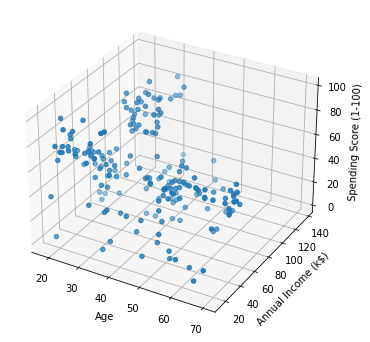

In [19]:
plt.figure(figsize= (9, 6))
ax = plt.axes(projection= '3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

In [20]:
kmeans_per_k_3d = [KMeans(n_clusters=k, random_state=42).fit(df.drop(['Gender'], axis= 1)) for k in range(1, 11)]
inertias_3d = [model.inertia_ for model in kmeans_per_k_3d]

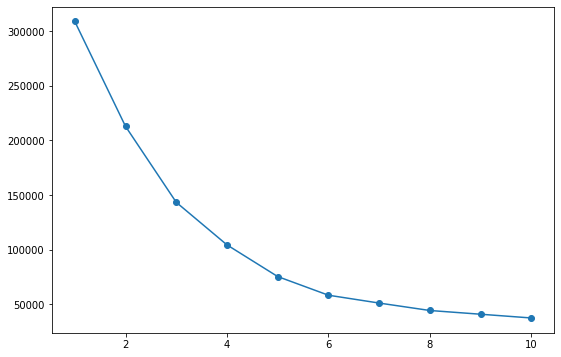

In [21]:
plt.figure(figsize=(9, 6))
plt.plot(range(1, 11), inertias_3d, "o-")

In [22]:
model_3d = KMeans(n_clusters= 6, init= 'k-means++')
model_3d.fit(df.drop(['Gender'], axis= 1))

KMeans(n_clusters=6)

In [23]:
silhouette_score(df.drop(['Gender'], axis= 1), model_3d.labels_)

0.4523443947724053

In [24]:
model_3d.cluster_centers_

array([[27.        , 56.65789474, 49.13157895],
       [56.15555556, 53.37777778, 49.08888889],
       [32.69230769, 86.53846154, 82.12820513],
       [41.68571429, 88.22857143, 17.28571429],
       [25.27272727, 25.72727273, 79.36363636],
       [44.14285714, 25.14285714, 19.52380952]])

Text(0.5, 0, 'Spending Score (1-100)')

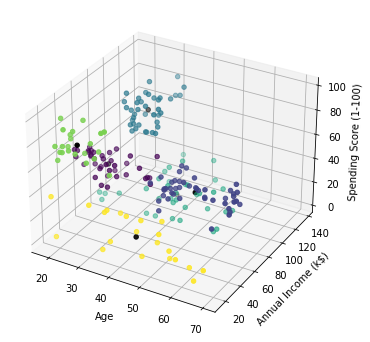

In [25]:
plt.figure(figsize= (9, 6))
ax = plt.axes(projection= '3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c= model_3d.labels_)
ax.scatter(model_3d.cluster_centers_[:, 0], model_3d.cluster_centers_[:, 1], model_3d.cluster_centers_[:, 2], c= 'black')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
single = AgglomerativeClustering(n_clusters= 6, linkage= 'single')
complete = AgglomerativeClustering(n_clusters= 6, linkage= 'complete')
average = AgglomerativeClustering(n_clusters= 6, linkage= 'average')
ward = AgglomerativeClustering(n_clusters= 6, linkage= 'ward')

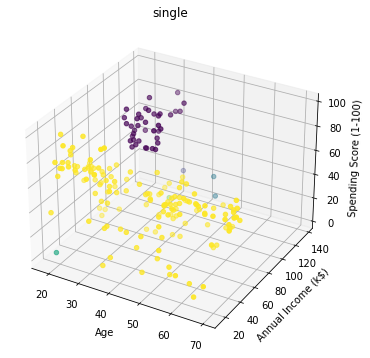

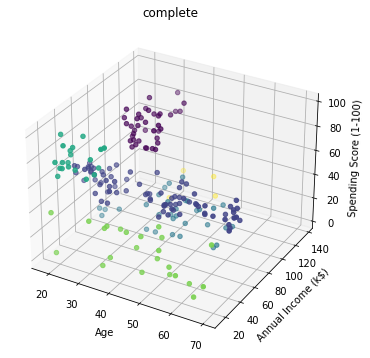

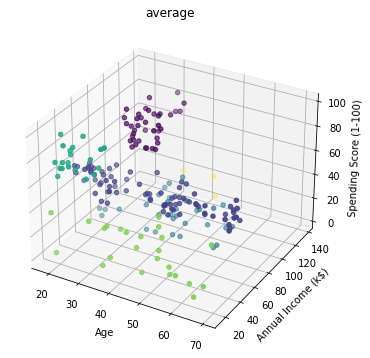

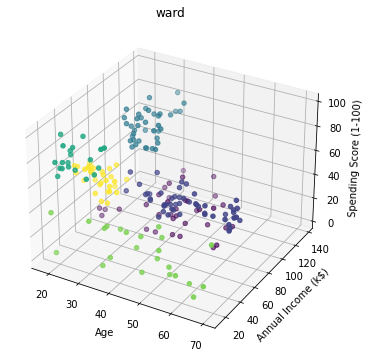

In [28]:
models = [single, complete, average, ward]
for model in models:
    model.fit(df.drop('Gender', axis= 1))
    plt.figure(figsize= (9, 6))
    ax = plt.axes(projection= '3d')
    ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c= model.labels_)
    ax.set_xlabel('Age')
    ax.set_ylabel('Annual Income (k$)')
    ax.set_zlabel('Spending Score (1-100)')
    ax.set_title(model.linkage)
    